# Проект по анализу А/B-теста

**Заказчик:** отдел маркетинга крупного интернет-магазина, который подготовил список гипотез для увеличения выручки.

## Цель проекта:

Приоритизировать гипотезы, запустить A/B-тест и проанализировать полученные результаты.

## Входные данные:

* файл с 9-тью гипотезами по увеличению выручки интернет-магазина
* файлы с результатами проведенного А/B-теста

## Описание данных:

Файл **hypothesis.csv**
* *Hypothesis* — краткое описание гипотезы;
* *Reach* — охват пользователей по 10-балльной шкале;
* *Impact* — влияние на пользователей по 10-балльной шкале;
* *Confidence* — уверенность в гипотезе по 10-балльной шкале;
* *Efforts* — затраты ресурсов на проверку гипотезы по 10-балльной шкале.

Файл **orders.csv**
* *transactionId* — идентификатор заказа;
* *visitorId* — идентификатор пользователя, совершившего заказ;
* *date* — дата, когда был совершён заказ;
* *revenue* — выручка заказа;
* *group* — группа A/B-теста, в которую попал заказ.

Файл **visitors.csv**
* *date* — дата;
* *group* — группа A/B-теста;
* *visitors* — количество пользователей в указанную дату в указанной группе A/B-теста

## План проекта:

### Импорт библиотек

### Часть 1. Приоритизация гипотез

* Откроем файл с данными
* Изучим общую информацию данных

* Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.
* Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.
* Сделаем выводы, как изменилась приоритизация гипотез при применении RICE вместо ICE.

### Часть 2. Анализ A/B-теста

* Откроем файлы с данными
* Изучим общую информацию данных

**Проанализируем A/B-тест:**
1. Построим график кумулятивной выручки по группам. Сделаем выводы и предположения.
2. Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения.
3. Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения.
4. Построим график кумулятивной конверсии по группам. Сделаем выводы и предположения.
5. Построим график относительного изменения кумулятивной конверсии группы B к группе A. Сделаем выводы и предположения.
6. Построим точечный график количества заказов по пользователям. Сделаем выводы и предположения.
7. Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.
8. Построим точечный график стоимостей заказов. Сделаем выводы и предположения.
9. Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.
10. Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным. Сделаем выводы и предположения.
11. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения.
12. Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделаем выводы и предположения.
13. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположения.
14. Примем решение по результатам теста и объясним его. 
    Варианты решений: 
    1. Остановить тест, зафиксировать победу одной из групп. 
    2. Остановить тест, зафиксировать отсутствие различий между группами. 
    3. Продолжить тест.

### Общие выводы

### Импортируем библиотеки

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

### Часть 1. Приоритизация гипотез

In [2]:
#загрузим данные
try: 
    hypothesis = pd.read_csv('/datasets/hypothesis.csv') #путь к файлу в общем хранилище 
except:
    hypothesis = pd.read_csv('C:/Users/Admin/Downloads/hypothesis.csv') #путь к файлу на локальной машине

In [3]:
#посмотрим на данные
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [4]:
#приведем названия столбцов к нижнему регистру
hypothesis.columns = hypothesis.columns.str.lower()
#изменим порядок индексации для удобства определения гипотез
hypothesis.index += 1
#настроим вывод, чтоб текст отображался полностью
pd.set_option('display.max_colwidth', None)
#проверим результат
hypothesis

,hypothesis,reach,impact,confidence,efforts
1,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
2,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
3,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
4,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
5,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
6,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
7,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
8,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
9,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Больше искать и исправлять какие-либо аномалии в таблице не нужно, поэтому можно приступить к решению задачи.

**Применим фреймворк ICE для приоритизации гипотез**. 

Отсортируем их по убыванию приоритета

In [5]:
hypothesis['ICE'] = (hypothesis['impact']
                     *hypothesis['confidence']
                     /hypothesis['efforts']
                    )

hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
9,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
1,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
8,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
7,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
3,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
2,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
6,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
4,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
5,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


Первая по приоритетности с помощью способа ICE является гипотеза **№9** - *Запустить акцию, дающую скидку на товар в день рождения*

**Применим фреймворк RICE для приоритизации гипотез**. 

Отсортируем их по убыванию приоритета

In [6]:
hypothesis['RICE'] = (hypothesis['reach']
                      *hypothesis['impact']
                      *hypothesis['confidence']
                      /hypothesis['efforts']
                     )
hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
8,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
3,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
1,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
7,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
9,"Запустить акцию, дающую скидку на товар в день рождения",16.2
4,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
2,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
6,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
5,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


C помощью фреймворка RICE получили приоритетную гипотезу: **№8** - *Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок*

Проранжируем получившиеся значения c помощью фреймворков ICE и RICE. Посмотрим приоритетность гипотез с помощью двух фреймворков одновременно.

In [56]:
# проранжируем приоритеты ICE и RICE,
# просуммируем получившиеся ранги
hypothesis['ice_rank'] = hypothesis['ICE'].rank()
hypothesis['rice_rank'] = hypothesis['RICE'].rank()
hypothesis['rank'] = hypothesis['ice_rank'] + hypothesis['rice_rank']
# отсортиуем гипотезы по полученным общим рангам
(hypothesis[['hypothesis', 'rank']]
    .sort_values(by='rank', ascending=False))

,hypothesis,rank
8,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",16.0
1,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",14.5
9,"Запустить акцию, дающую скидку на товар в день рождения",14.0
3,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",13.0
7,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",12.5
2,"Запустить собственную службу доставки, что сократит срок доставки заказов",6.5
4,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",6.0
6,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",5.5
5,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",2.0


### Выводы:

Приоритетность гипотез при применении RICE вместо ICE изменилась. Происходит это из-за того, что в способе RICE в числитель добавляется ещё один множитель - параметр **Reach**, например:

**Гипотеза №8** - *'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'*, при методе ICE, имела 3-й приоритет.
С помощью метода RICE эта гипотеза получила уже 1-й приоритет. 

На изменение повлиял параметр **Reach**, у этой гипотезы он оценен максимальным балом - 10. 
Параметр Reach отвечает за охват, то есть, скольких пользователей затронет предполагаемое изменение. 

При ранжировании приоритетов обоих фреймворков ICE и RICE, как и при приоритизации по RICE, первый приоритет также получила гипотеза **№8** *Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок*

### Часть 2. Анализ A/B-теста

In [7]:
#загрузим данные
#1й фрейм данных
try: 
    orders = pd.read_csv('/datasets/orders.csv') #путь к файлу в общем хранилище
except: 
    orders = pd.read_csv('C:/Users/Admin/Downloads/orders.csv') #путь к файлу на локальной машине
#2й фрейм данных  
try: 
    visitors = pd.read_csv('/datasets/visitors.csv') #путь к файлу в общем хранилище
except: 
    visitors = pd.read_csv('C:/Users/Admin/Downloads/visitors.csv') #путь к файлу на локальной машине

In [8]:
#посмотрим на данные
display(orders.head())
visitors.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [9]:
#посмотрим общую информацию по фрейму orders
print('Общая информация')
print(orders.info())
print('====================================')
print('Дубликатов в таблице:', orders.duplicated().sum())
print('====================================')
print('Пропусков в таблице:')
print(orders.isna().sum())
print('====================================')
print('Количество уникальных значений:')
print(orders.nunique())

Общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None
Дубликатов в таблице: 0
Пропусков в таблице:
transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64
Количество уникальных значений:
transactionId    1197
visitorId        1031
date               31
revenue           713
group               2
dtype: int64


In [10]:
#посмотрим общую информацию по фрейму visitors
print('Общая информация')
print(visitors.info())
print('====================================')
print('Дубликатов в таблице:', visitors.duplicated().sum())
print('====================================')
print('Пропусков в таблице:')
print(visitors.isna().sum())
print('====================================')
print('Количество уникальных значений:')
print(visitors.nunique())

Общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None
Дубликатов в таблице: 0
Пропусков в таблице:
date        0
group       0
visitors    0
dtype: int64
Количество уникальных значений:
date        31
group        2
visitors    58
dtype: int64


Аномалий и отклонений в обоих датафеймах не найдено. Можно приступать к анализу

**Проанализируем A/B-тест:**

**1. Построим график кумулятивной выручки по группам. Сделаем выводы и предположения.**

In [11]:
display(orders.head())
visitors.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Соберем кумулятивные данные

In [12]:
#создадим датафрейм с уникальными парами значений 'date' и 'group', таблицы orders. Избавимся от дубликатов
datesGroups = orders[['date','group']].drop_duplicates()
#объявим переменную ordersAggregated, в которой:
#дата
#группа A/B-теста
#число уникальных заказов в группе теста по указанную дату включительно
#число уникальных пользователей, совершивших хотя бы 1 заказ в группе теста по указанную дату включительно
#суммарная выручка заказов в группе теста по указанную дату включительно
ordersAggregated = (datesGroups\
                    .apply(lambda x: orders[np.logical_and(orders['date'] <= x['date']
                                                           , orders['group'] == x['group'])]\
                           .agg({'date' : 'max'        
                                 , 'group' : 'max'
                                 , 'transactionId' : 'nunique'
                                 , 'visitorId' : 'nunique'
                                 , 'revenue' : 'sum'}), axis=1)\
                    .sort_values(by=['date','group'])
                   )
#объявим переменную visitorsAggregated, в которой:
#дата
#группа A/B-теста
#количество уникальных посетителей в группе теста по указанную дату включительно
visitorsAggregated = (datesGroups
                      .apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date']
                                                               , visitors['group'] == x['group'])]
                             .agg({'date' : 'max'
                                   , 'group' : 'max'
                                   , 'visitors' : 'sum'}), axis=1)
                      .sort_values(by=['date','group'])
                     )
#объединим обе переменные в новую
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group']
                                        , right_on=['date', 'group'])
#переименуем столбцы
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

#переведем дату в формат datetime и добавим столбец с днями
#cumulativeData['date'] = pd.to_datetime(cumulativeData['date'], format="%Y-%m-%d")
#cumulativeData['day'] = cumulativeData['date'].dt.day

#посмотрим результат
cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Объявим переменные, в которых сохраним данные о датах, выручке и числе заказов в группах A и B.

Построим график кумулятивной выручки по дням по группам

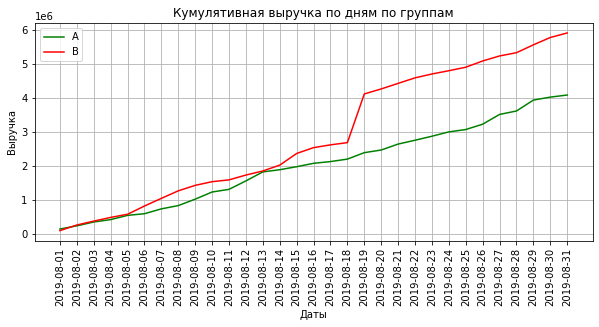

In [13]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе A
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# тоже самое в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
 
fig, ax = plt.subplots(figsize=(10, 4)) 
# Строим график выручки группы А 
ax.plot(cumulativeRevenueA['date']
        , cumulativeRevenueA['revenue']
        , color = 'green'
        , label = 'A')
# Строим график выручки группы B
ax.plot(cumulativeRevenueB['date']
        , cumulativeRevenueB['revenue']
        , color = 'red'
        , label = 'B') 

ax.legend(loc = 'upper left') 
ax.grid()
plt.xticks(rotation=90)
plt.legend()
plt.title('Кумулятивная выручка по дням по группам')
plt.xlabel("Даты")
plt.ylabel("Выручка")
plt.show()

На графике у двух групп идет практически равномерный рост. Однако в середине теста, 18.08.2019г., у группы В наблюдается скачкообразный рост выручки. Возможно в выборку попали очень дорогие заказы, либо резко увеличилось их количество. Такие выбросы могут повлиять на результаты графиков.

**2. Построим график кумулятивного среднего чека по группам**

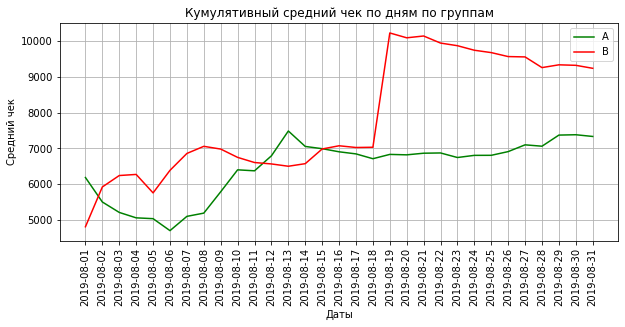

In [14]:
fig, ax = plt.subplots(figsize=(10, 4)) 
# Строим график выручки группы А 
ax.plot(cumulativeRevenueA['date']
        , cumulativeRevenueA['revenue']/cumulativeRevenueA['orders']
        , color = 'green'
        , label = 'A')
# Строим график выручки группы B
ax.plot(cumulativeRevenueB['date']
        , cumulativeRevenueB['revenue']/cumulativeRevenueB['orders']
        , color = 'red'
        , label = 'B') 

ax.legend() 
ax.grid()
plt.xticks(rotation=90)
plt.title('Кумулятивный средний чек по дням по группам')
plt.xlabel("Даты")
plt.ylabel("Средний чек")
plt.show()


Кумулятивный средний чек по группе В тоже имеет скачок в тот же день, что и на предыдущем графике. Требуется дополнительный анализ выбросов, искажающих результаты.

**3. Построим график относительного изменения кумулятивного среднего чека группы B к группе A**

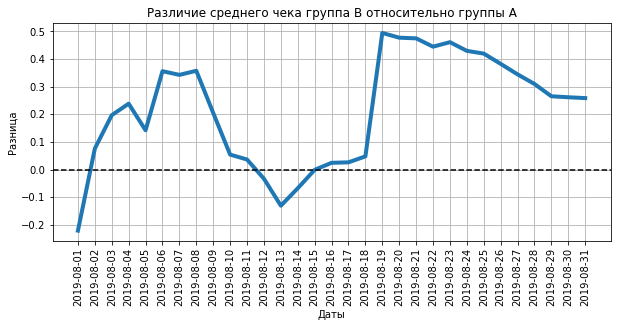

In [15]:

# собираем датафреймы в один
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB
                                                   , left_on='date'
                                                   , right_on='date'
                                                   , how='left'
                                                   , suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(10, 4))
plt.plot(mergedCumulativeRevenue['date']
         , (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1, linewidth = 4)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.title('Различие среднего чека группа В относительно группы А')
plt.xlabel("Даты")
plt.ylabel("Разница")
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

Различия среднего чека групп ярко выражено несколькими всплесками в определенные даты. Вероятно в эти дни были большие заказы (по выручке и/или количеству)

**4. Построим график кумулятивной конверсии по группам**

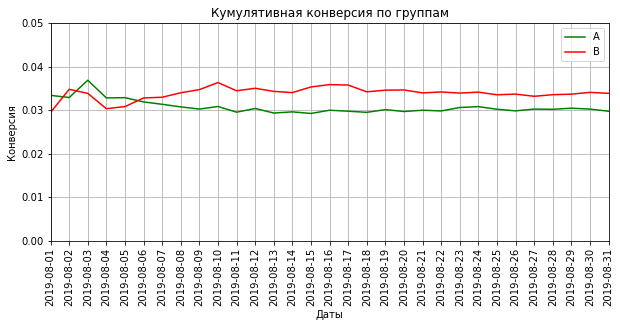

In [16]:
# добавим столбец с кумулятивной конверсией
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# формируем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# формируем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

fig, ax = plt.subplots(figsize=(10, 4)) 
# Строим график выручки группы А 
ax.plot(cumulativeDataA['date'], cumulativeDataA['conversion']
        , color = 'green'
        , label = 'A')
# Строим график выручки группы B
ax.plot(cumulativeDataB['date'], cumulativeDataB['conversion']
        , color = 'red'
        , label = 'B') 
# задаем масштаб осей
plt.axis(["2019-08-01", '2019-08-31', 0, 0.05])

ax.legend() 
ax.grid()
plt.xticks(rotation=90)
plt.title('Кумулятивная конверсия по группам')
plt.xlabel("Даты")
plt.ylabel("Конверсия")
plt.show()

В первые 4 дня теста видим рост и падение на начальные позиции конверсий обеих групп. С начала второй недели конверсия группы А ушла вниз, а группы В вверх, cтабилизировавшись с разницей в половину значения.

**5. Построим график относительного изменения кумулятивной конверсии группы B к группе A**

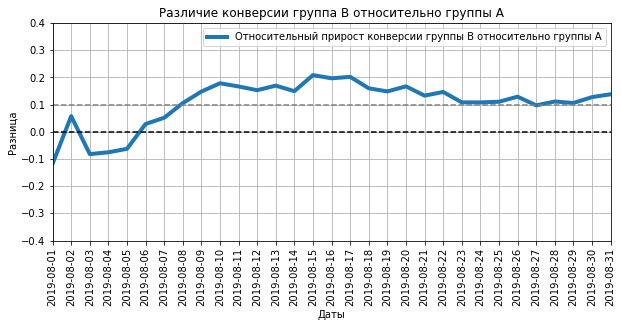

In [17]:
# объединим таблицы cumulativeDataA и cumulativeDataB методом merge()
mergedCumulativeConversions = (cumulativeDataA[['date','conversion']]
                               .merge(cumulativeDataB[['date','conversion']]
                                      , left_on='date'
                                      , right_on='date'
                                      , how='left'
                                      , suffixes=['A', 'B'])
                              )
plt.figure(figsize=(10, 4))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']
         /mergedCumulativeConversions['conversionA']-1
         , label="Относительный прирост конверсии группы B относительно группы A", linewidth = 4)
plt.legend()
                             
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
# задаем масштаб осей
plt.axis(["2019-08-01", '2019-08-31', -0.4, 0.4])

plt.title('Различие конверсии группа В относительно группы А')
plt.xlabel("Даты")
plt.ylabel("Разница")
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

С начала второй недели, группа В вышла в лидеры по конверсии, в середине теста - на 20% выше группы А, на конец теста зафикровалась на уровне 10-15% от группы А.

Окончательные выводы по тесту сделать нельзя, требуется проанализировать аномалии.

**6. Построим точечный график количества заказов по пользователям**

In [18]:
#создадим датафрейм, сгруппируем количество заказов по пользователям
ordersByUsers = (orders
        .drop(['group', 'revenue', 'date'], axis=1)
        .groupby('visitorId', as_index=False)
        .agg({'transactionId' : 'nunique'})
       )
#переименуем столбцы
ordersByUsers = ordersByUsers.rename(columns={'visitorId': 'users', 'transactionId': 'orders'}) 
ordersByUsers.sort_values(by='orders', ascending=False).head()

,users,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5


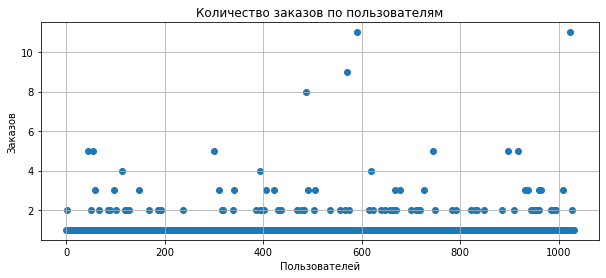

In [19]:
plt.figure(figsize=(10, 4))
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Количество заказов по пользователям')
plt.xlabel("Пользователей")
plt.ylabel("Заказов")
plt.grid(True)
plt.show()

Пользователей, совершивших более 2-х заказов немного. Возможно это аномальные выбросы.

**7. Посчитаем 95-й и 99-й перцентили количества заказов на пользователя.** 

Выберем границу для определения аномальных пользователей.

In [20]:
# отсортируем датафрейм по количеству заказов
# и применим метод percentile()
ordersByUsers_percentile = ordersByUsers.sort_values(by='orders', ascending=False)
np.percentile(ordersByUsers_percentile['orders'], [90, 95, 99])

array([1., 2., 4.])

Не более 5% заказывали более 2-х раз и не более 1% - более 4-х. Границей для отсечения аномальных выбросов будет количество 4 заказа на пользователя и более.

**8. Построим точечный график стоимостей заказов**

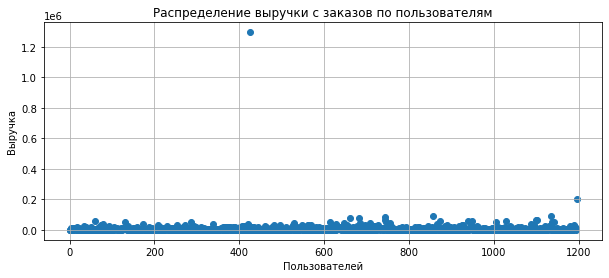

In [21]:
plt.figure(figsize=(10, 4))
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('Распределение выручки с заказов по пользователям')
plt.xlabel("Пользователей")
plt.ylabel("Выручка")
plt.grid(True)
plt.show() 

Почти все заказы стоимостью менее 200 000 рублей. Есть один заказ на 200 000 рублей и один заказ на более 1 200 000 рублей. 
Проверим методом выборочных перцентелей.

**9. Посчитаем 95-й и 99-й перцентили стоимости заказов.**

Выберем границу для определения аномальных заказов

In [22]:
# применим метод percentile()
np.percentile(orders['revenue'], [90, 95, 99])

array([18168. , 28000. , 58233.2])

Не более 5% заказов с выручкой более 28 000 рублей и не более 1% - более 58 233 рублей. Границей для отсечения аномальных выбросов будет значение выручки не более 58 233 рубля и более.

**10. Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным**

Подготовим данные

In [23]:
# сгруппируем пользователей группы А по датам
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']
# аккумулируем количество пользователей группы А до выбранной даты включительно
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']
# сгруппируем пользователей группы В по датам
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']
# аккумулируем количество пользователей группы В до выбранной даты включительно
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']
# посчитаем количество заказов и суммарную выручку по группе А на каждую дату
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']
# аккумулируем кол-во заказов и вуручку по группе А до выбранной даты включительно
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]
# посчитаем количество заказов и суммарную выручку по группе В на каждую дату
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']
# аккумулируем кол-во заказов и вуручку по группе В до выбранной даты включительно
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]
# присоединим созданные фреймы в один
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)
# посмотрим результат
data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [24]:
# создадим переменные, в которых для пользователей, совершившие хотя бы 1 раз, укажем число совершённых заказов.
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']
#проверим
display(ordersByUsersA.head(3))
ordersByUsersB.head(3)

,visitorId,orders
0,8300375,1
1,11685486,1
2,54447517,1


,visitorId,orders
0,5114589,1
1,6958315,1
2,8300375,1


In [25]:
# объявим переменные, в которых пользователям с заказами будет соответствовать число заказов пользователя
# а пользователям без заказов — нули
sampleA = (pd.concat([ordersByUsersA['orders']
                      ,pd.Series(0
                                 , index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders']))
                                 , name='orders')]
                      ,axis=0)
          )
sampleB = (pd.concat([ordersByUsersB['orders']
                     ,pd.Series(0
                                , index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders']))
                                , name='orders')]
                     ,axis=0)
          )

На предыдущих этапах проанализировали результаты A/B-теста и определили, что вероятно в данных есть выбросы.

Определили для выбросов границу.

Теперь, подготовив данные, посчитаем статистическую значимость различий в среднем числе заказов на пользователя и среднем чеке между группами по «сырым» данным с учетом аномальных пользователей.

### Сформулируем гипотезы.

**Нулевая:** различий в среднем между группами нет. 
    
**Альтернативная:** различия в среднем между группами есть.

In [26]:
# проверим статистическую значимость критерием Манна-Уитни
print('p-value =', "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
# выведем относительный прирост среднего числа заказов группы B
print('Относительное различие =',"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value = 0.017
Относительное различие = 0.138


**p-value** = 0.017 менее 0.05. 

Значит, нулевую гипотезу о том, что *статистически значимых различий в среднем числе заказов между группами нет*, **отвергаем**.



**Относительный прирост** среднего группы B равен **13.8%**

**11. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным**

In [27]:
# проверим статистическую значимость критерием Манна-Уитни
print('p-value =', '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue']
                                                       , orders[orders['group']=='B']['revenue'])[1]))
# посчитаем относительное различие в среднем чеке между группами
print('Относительное различие =', '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/
                                                   orders[orders['group']=='A']['revenue'].mean()-1)) 

p-value = 0.729
Относительное различие = 0.259


**p-value** = 0.729 значительно больше 0.05. Оснований отвергать нулевую гипотезу нет.

А вот относительное различие среднего группы В равняется 25.9%, очень много.

**12. Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным**

Ранее было расчитано: 
* 95-й и 99-й перцентили числа заказов на одного пользователя равны 2 и 4 заказам на пользователя.
* 95-й и 99-й перцентили средних чеков равны 28 000 и 58 233 рублям

Примем за аномальных пользователей тех, кто совершил более 2 заказов, или совершил заказ на сумму свыше 30 000 рублей.

Посмотрим сколько пользователей подпадает под условия аномальности

In [57]:
# объявим переменную, с помощью срезов по двум группам с условием равно и более 4х заказов определим пользователей
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] >= 4]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] >= 4]['visitorId'],
    ],
    axis=0,
)
# также сделаем для условия более 58 233 рублей за заказ
usersWithExpensiveOrders = orders[orders['revenue'] >= 58233]['visitorId']
# объединим два среза, удалим дубликаты и посмотрим количество пользователей с аномальными значениями
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
display(abnormalUsers.head(5))
abnormalUsers.shape[0]

1099    148427295
18      199603092
23      237748145
949     887908475
744     888512513
Name: visitorId, dtype: int64

20

Всего 20 пользователей, подпадающих под условия аномальных значений

Подготовим данные по количеству заказов пользователей по группам

In [58]:
# объявим переменные, в которых пользователям с заказами будет соответствовать число заказов пользователя
# для пользователей без заказов — нули
# исключим из выборки "аномальных" пользователей
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным

In [59]:
print('p-value =', '{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительное различие =', '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p-value = 0.014
Относительное различие = 0.151


**Статистическая значимость** = 0.014, с аномальными значениями она составила 0.017. 

Разница невелика, значение стат. значимости с "очищенными" значениями также менее 0.05, соответственно, нулевую гипотезу о том, что *статистически значимых различий в среднем числе заказов между группами нет*, **отвергаем**.

**Относительный прирост** среднего группы B равен **15.1%**, с "аномалиями" = **13.8%**. Прирост среднего по количеству заказов группы В без аномальных значений стал ещё больше.

**13. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным**

In [60]:
# проверим статистическую значимость критерием Манна-Уитни
# и посчитаем относительное различие в среднем чеке между группами
print(
    'p-value =', '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    'Относительное различие =', "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

p-value = 0.959
Относительное различие = -0.014


**Статистическая значимость** = 0.959, с аномальными значениями она составила 0.729. 

Оснований отвергать нулевую гипотезу нет.

**Относительный разница** среднего группы В без аномалий снизилась до -1.4%, с аномальными значениями она составила 25.9%.

Предположение, что в группу B попали выбросы, которые повлияли на средний чек группы, подтверждается.

### Результаты анализа А/В-теста:
* **Есть статистически значимое различие** по количеству заказов пользователей между группами как по сырым данным, так и после фильтрации аномалий.
* По данным без аномалий  относительный прирост конверсии группы B составил **15,1%**
* По среднему чеку между группами, как по сырым данным, так и после удаления аномалий, **статистически значимого различия нет**.
* По данным без аномалий относительное различие в среднем чеке группы B составило -1,4%.
* График различия конверсии между группами сообщает, что результаты группы B лучше группы A: имеют тенденцию к росту, либо зафиксировались на уровне 15% выше конверсии группы А.
* На график различия среднего чека влияют выбросы. Можно предположить, что значение среднего чека группы В будет и дальше снижаться.

### 14. Решение по результатам анализа А/В-теста:

**Остановить тест, зафиксировать победу группы В**

Показатели конверсии пользователей группы В имеют положительное различие при сравнительно одинаковом среднем чеке с группой А.

## Общие выводы:

**Часть 1. Приоритизация гипотез**

* При приоритизации фреймворком RICE и общим ранжированием 1-й приоритет получила **гипотеза №8** - *'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'*.

**Часть 2. Анализ A/B-теста**

* По результатам анализа А/В-теста, группа В показала прирост по показателям конверсии пользователей около 15% с одинаковым средним чеком.

Принято решение **остановить тест и зафиксировать победу группы В**.